# SC4020 Assignment 1 - Clustering

In the field of data science, clustering plays a crucial role in unsupervised learning. Numerous clustering algorithms exist, each offering unique advantages. This report delves into various clustering algorithms, detailing their strengths and weaknesses, and examines the impact of adjusting their hyperparameters on performance. Multiple datasets from diverse domains are utilized to assess the effectiveness and efficiency of these algorithms.

In [101]:
pip install --upgrade matplotlib seaborn pandas


Note: you may need to restart the kernel to use updated packages.


In [102]:

from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Mall Customer Segmentation Data

The dataset, sourced from Kaggle, pertains to the commerce domain and encompasses details of 200 customers including age, gender, income, and spending levels. Clustering is employed in this dataset to delineate distinct customer segments for targeted advertising campaigns and promotions based on spending levels.



In [103]:
customer_df = pd.read_csv('Mall_Customers.csv')
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [104]:
customer_df.info()
customer_df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [105]:
customer_df.shape

(200, 5)

In [106]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [107]:
customer_df.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [108]:
customer_datatype = customer_df.dtypes
customer_datatype.value_counts()

int64     4
object    1
Name: count, dtype: int64

In [109]:
customer_df.isnull()

,CustomerID,Gender,Age,Income,Score
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [110]:
# Identify numerical, discrete, continuous, and categorical features
numerical_features = [col for col in customer_df.columns if customer_df[col].dtype != 'O']
discrete_features = [col for col in numerical_features if customer_df[col].nunique() < 10 and col != 'CustomerID']
continuous_features = [col for col in numerical_features if col not in discrete_features + ['CustomerID']]
categorical_features = [col for col in customer_df.columns if customer_df[col].dtype == 'O']

# Print the counts of each type of feature
print(f"Total Number of Numerical Columns: {len(numerical_features)}")
print(f"Number of Discrete Features: {len(discrete_features)}")
print(f"Number of Continuous Features: {len(continuous_features)}")
print(f"Number of Categorical Features: {len(categorical_features)}")

Total Number of Numerical Columns: 4
Number of Discrete Features: 0
Number of Continuous Features: 3
Number of Categorical Features: 1


<Axes: >

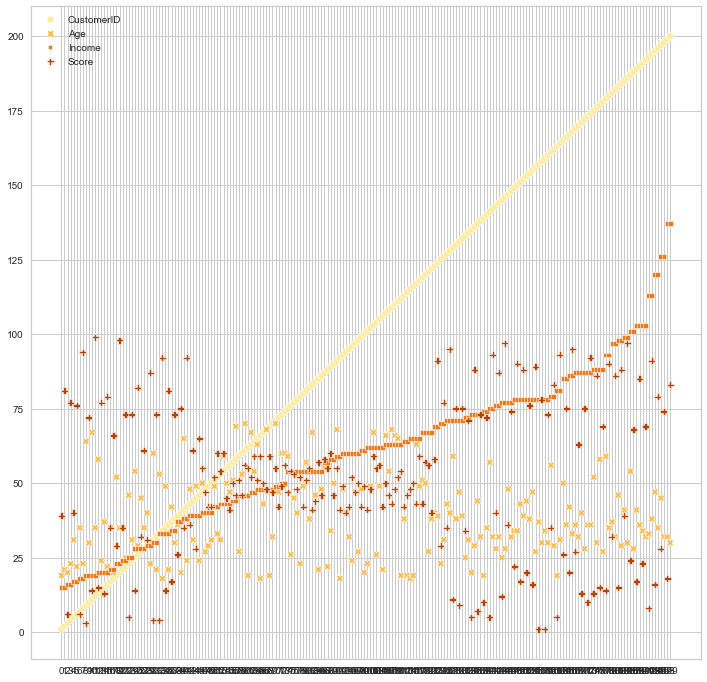

In [111]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = customer_df, palette = "YlOrBr")

/var/folders/3f/9qdw6mpd3439mjb47kq53dx80000gn/T/ipykernel_16920/2326799783.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Gender', data = customer_df, palette = 'Set2')


<Axes: xlabel='Gender', ylabel='count'>

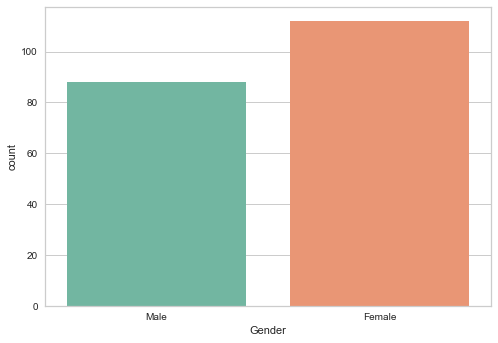

In [112]:
sns.countplot(x ='Gender', data = customer_df, palette = 'Set2')

<Axes: xlabel='Age', ylabel='Score'>

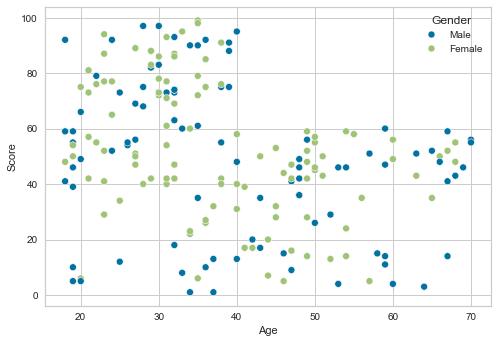

In [113]:
sns.scatterplot(data = customer_df, x = "Age", y = "Score", sizes=(60, 280), hue = "Gender")

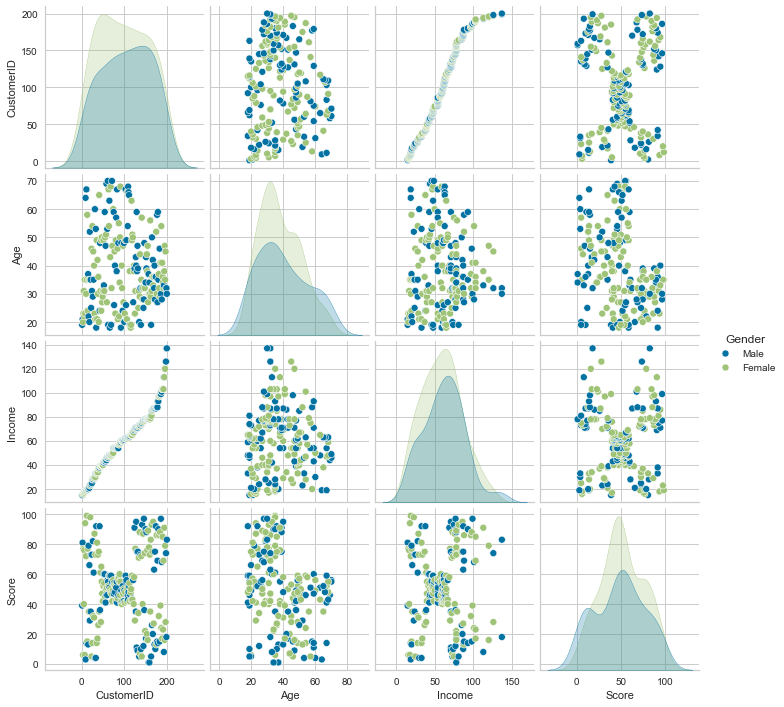

In [114]:
sns.pairplot(customer_df, hue = "Gender")

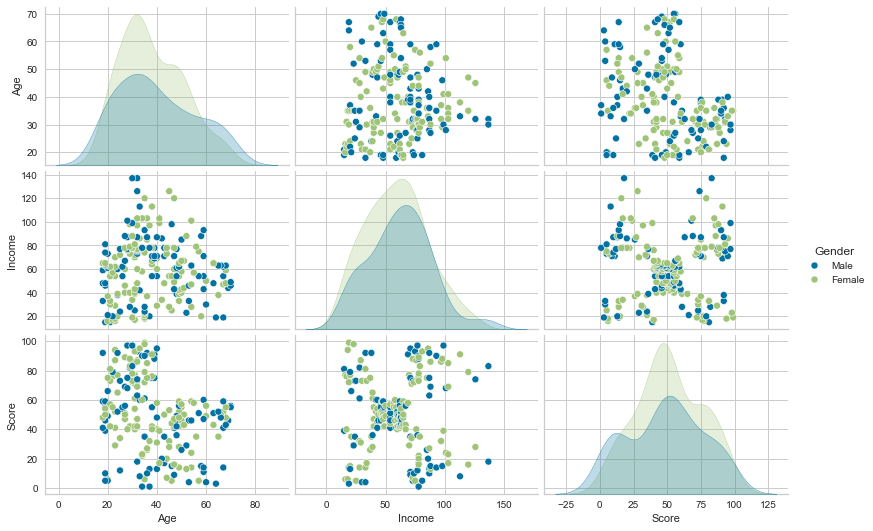

In [115]:
X = customer_df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(customer_df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

We performed EDA and found there are more female customers than male customers. Females are 56% of total customers and that the mean and median income of male customers is higher than female customers. In terms of standard deviation it is almost similar for both the groups but we can see an outlier from male where the annual income is close to 140K. We found that spending scores are higher for women than men. We found that most wealthy customers are from age's around 20-45, where younger men from age 25-40 are richer than the women.

In [116]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
customer_df["Gender"] = encoder.fit_transform(customer_df["Gender"].values)
customer_df

,CustomerID,Gender,Age,Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [117]:
customer_df.dtypes

CustomerID    int64
Gender        int64
Age           int64
Income        int64
Score         int64
dtype: object

## Elbow method and silhouette score

We need to find optimal number of cluster before doing K-means which is considered as one of the disadvantages because it isnt needed for other algorithms like DBSCAN.

Elbow method can be used to find the number of clusters. In the elbow method we measure within-cluster sum of squares(WCSS), while iterating over a number of clusters(k) and choose the best one. The best number of clusters can be identified by looking for the elbow point where the graph starts to look like a straight line.


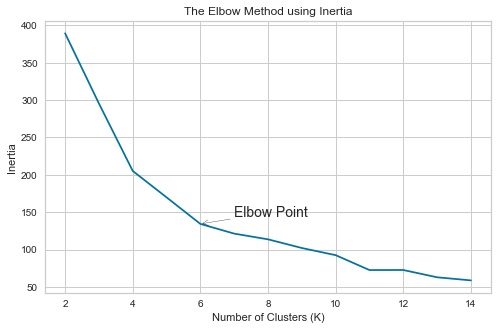

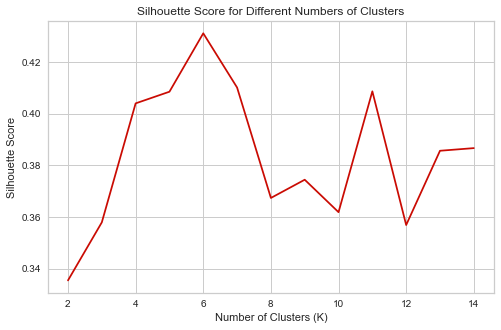

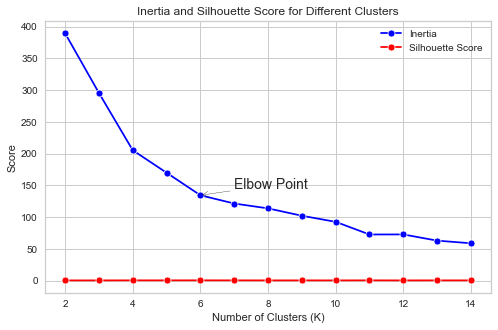

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = customer_df.iloc[:, 2:]  # Exclude 'CustomerID' and 'Gender'
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Initialize lists 
inertia_list = []
silhouette_scores = []
range_val = range(2, 15)  

# Looping different numbers of clusters
for i in range_val:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.predict(X_scaled)
    
    inertia_list.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

# Plotting the Elbow Method (Inertia)
plt.figure(figsize=(8, 5))
plt.plot(range_val, inertia_list, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

# Annotate the elbow point
elbow_val_k = 6  # Adjust based on the actual result
elbow_inertia = inertia_list[elbow_val_k - 2]  # Adjusting for range starting from 2
plt.annotate('Elbow Point', 
             xy=(elbow_val_k, elbow_inertia), 
             xytext=(elbow_val_k + 1, elbow_inertia + 10),  # Adjust the offset
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=14)
plt.show()


# Plotting the Silhouette Score for different numbers of clusters
plt.figure(figsize=(8, 5))
plt.plot(range_val, silhouette_scores, 'rx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Plotting both Inertia (Elbow) and Silhouette Score together
plt.figure(figsize=(8, 5))
sns.lineplot(x=range_val, y=inertia_list, label='Inertia', color='blue', marker="o")
sns.lineplot(x=range_val, y=silhouette_scores, label='Silhouette Score', color='red', marker="o")
plt.title('Inertia and Silhouette Score for Different Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.legend()

# Annotate the elbow point on the combined plot
plt.annotate('Elbow Point', 
             xy=(elbow_val_k, elbow_inertia), 
             xytext=(elbow_val_k + 1, elbow_inertia + 10),  # Adjust the offset if necessary
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=14)

plt.show()


## K-Means


The advantages of Kmeans:
- Efficiency: K-Means is very efficient and fast. Its linear time complexity allows it to handle large datasets effectively. For large, unlabeled data, K-Means provides valuable insights as an unsupervised clustering method. 

- Simplicity: Due to its simplicity, Kmeans is relatively straightforward to implement and helps uncover hidden data groups in complex datasets. The results can be easily interpreted even if dataset size is large.

- Flexibility: K-Means is a flexible algorithm that adapts easily to changes. This flexibility allows us to use it for tasks like data segmentation, data analysis, dimensionality reduction, feature engineering, anamaly detection, semi-supervised learning, search engines and image segmentation. 

The drawbacks of Kmeans:
- We need to specify the number of clusters, which can be a hassel. The solution for this problem is to use elbow method to find the optimal number of clusters. We run Kmeans for a number of clusters(k) and find Silhouette Coefficient for each number of clusters and find the elbow point. We explored this method below and elaborated it more in the experiments section.
- It is necessary to run the Kmeans algorithm several times to avoid suboptimal solutions. Since Kmeans is very sensitive to the centroid initialization and different initializations of centroids result in different clusters.
- It doesn't behave well when the clusters have varing sizes, different densities or nonspherical shapes. Optimizing for inertia as a metric can be challenging because it assumes that clusters are globular. This can result in the algorithm struggling to create elongated or irregularly shaped clusters, and it tends to perform better with clusters that are spherical or circular in shape.


KMeans Clustering for 3 clusters:
Number of clusters: 3
Clustering took 0.01 s
Silhouette Coefficient: 0.3579234303882264


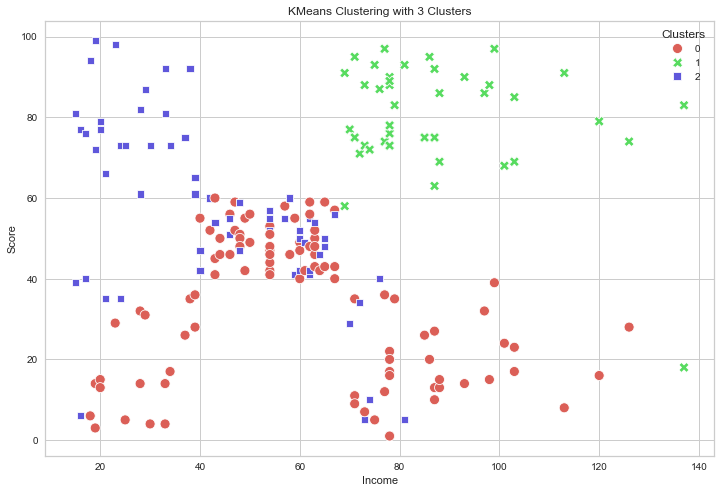


KMeans Clustering for 4 clusters:
Number of clusters: 4
Clustering took 0.01 s
Silhouette Coefficient: 0.4039582785148566


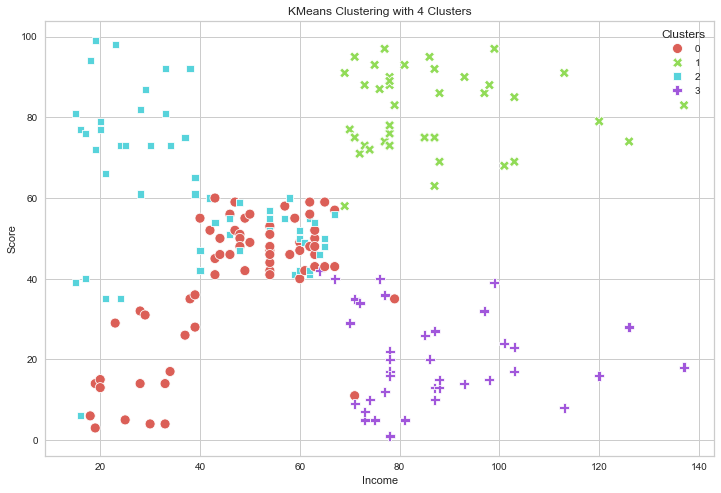


KMeans Clustering for 5 clusters:
Number of clusters: 5
Clustering took 0.01 s
Silhouette Coefficient: 0.40846873777345605


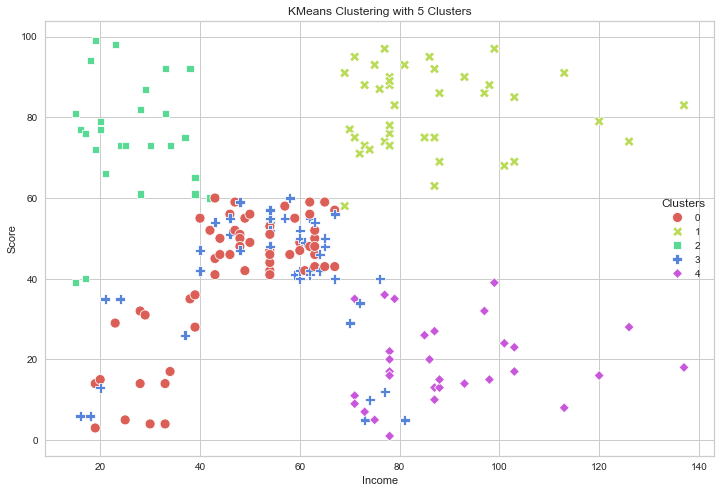


KMeans Clustering for 6 clusters:
Number of clusters: 6
Clustering took 0.01 s
Silhouette Coefficient: 0.43106526216603014


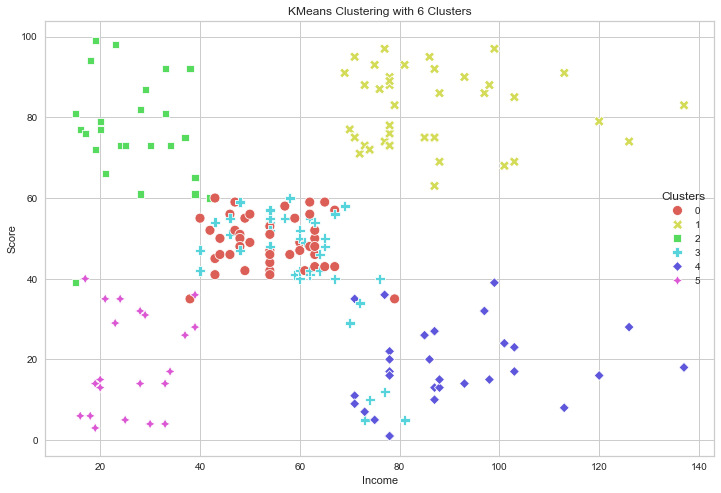


KMeans Clustering for 7 clusters:
Number of clusters: 7
Clustering took 0.01 s
Silhouette Coefficient: 0.410091114520974


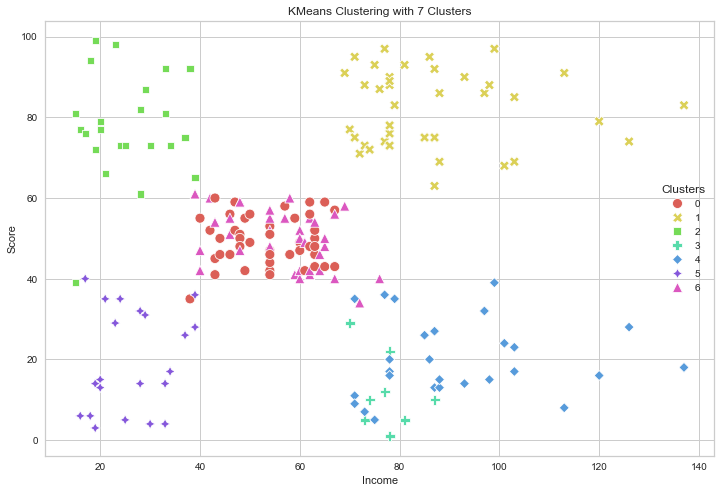


KMeans Clustering for 8 clusters:
Number of clusters: 8
Clustering took 0.01 s
Silhouette Coefficient: 0.3673663165322295


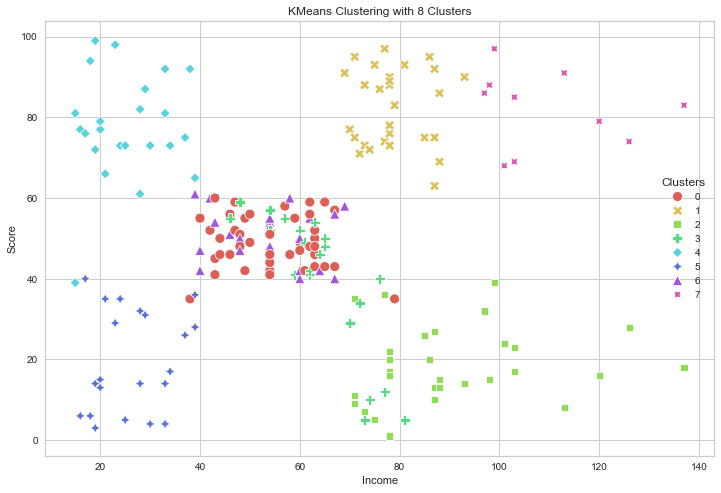

In [119]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = customer_df.iloc[:, 2:]  # Exclude 'CustomerID' and 'Gender'
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

def plotting_the_clusters(data, algorithm, args, kwds, verbose=True):
    
    start_time = time.time()
    
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)
    
    end_time = time.time()
    
    # silhouette score
    sc = metrics.silhouette_score(data, labels, metric='euclidean')
    
    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Silhouette Coefficient: {sc}")
    
    return sc, len(np.unique(labels))

# Iterate over no of clusters from 3 to 8
for n_clusters in range(3, 9):
    print(f"\nKMeans Clustering for {n_clusters} clusters:")
    
    silhouette_score, num_clusters = plotting_the_clusters(X_scaled, KMeans, (), {'n_clusters': n_clusters, 'random_state': 42})
    
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    customer_df['Labels'] = kmeans_model.fit_predict(X_scaled)
    
    # Visualize the clusters
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=customer_df, x='Income', y='Score', hue='Labels', 
                    palette=sns.color_palette('hls', num_clusters), style='Labels', s=100)
    
    plt.title(f'KMeans Clustering with {n_clusters} Clusters')
    plt.xlabel('Income')
    plt.ylabel('Score')
    plt.legend(title='Clusters')
    plt.show()



KMeans Clustering for 6 clusters:
Number of clusters: 6
Clustering took 0.01 s
Silhouette Coefficient: 0.43950556159154563


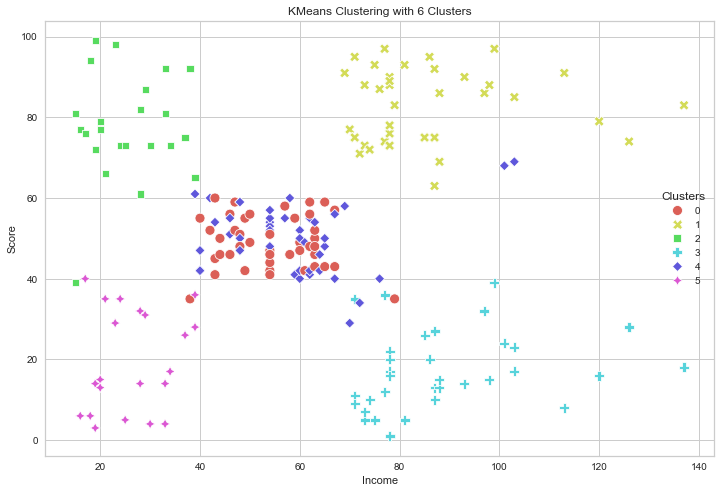

In [120]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Assume 'customer_df' is already defined with necessary columns
X = customer_df.iloc[:, 2:]  # Exclude 'CustomerID' and 'Gender'
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

def plotting_the_clusters(data, algorithm, args, kwds, verbose=True):
    
    start_time = time.time()
    
    # Fit the clustering algorithm
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)
    
    end_time = time.time()
    
    # Compute silhouette score
    sc = metrics.silhouette_score(data, labels, metric='euclidean')
    
    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Silhouette Coefficient: {sc}")
    
    return sc, len(np.unique(labels))

# Set the number of clusters to 6
n_clusters = 6
print(f"\nKMeans Clustering for {n_clusters} clusters:")

silhouette_score, num_clusters = plotting_the_clusters(X_scaled, KMeans, (), {'n_clusters': n_clusters, 'random_state': 42})

# Create the KMeans model with 6 clusters
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
customer_df['Labels'] = kmeans_model.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_df, x='Income', y='Score', hue='Labels', 
                palette=sns.color_palette('hls', num_clusters), style='Labels', s=100)

plt.title(f'KMeans Clustering with {n_clusters} Clusters')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Clusters')
plt.show()


The kmeans algorithm shows that it is able to group 6 clusters but there are quite a few data points that are misclassified we can clearly see in cluster 0(red) and 4(blue).


In [121]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


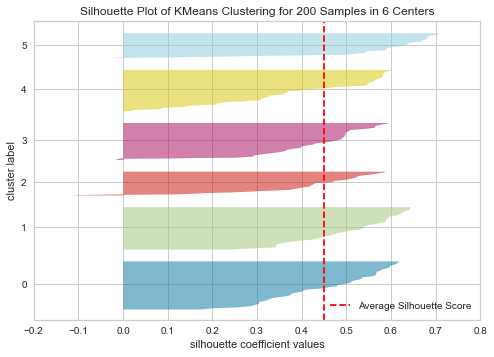

In [122]:
# Import necessary libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
cust_num = customer_df[['Age', 'Income', 'Score']]
# Define and fit the KMeans model
kmeans_model = KMeans(n_clusters=6, random_state=0)

# Create the SilhouetteVisualizer and fit the data
visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')
visualizer.fit(cust_num)

# Display the visualization
visualizer.show()
plt.show()


From the plots produced above from elbow method and Kmeans, we can conclude that optimal number of clusters is 6. It is accurate for this dataset because we observed the elbow point using inertia graph which gave 6 as well as we found that silhouette coefficient is the highest for Kmeans clustering for 6 clusters. We know that silhouette score is 0.43950556159154563 which is considered moderately good clustering as few data points do not fit into their perticular clusters.

### Evaluation of Kmeans Algorithm
- Performance: Kmeans is very efficient especially even if the dataset is large as it is very efficient.
- Parameter Tuning: We can tune the number of clusters to find the optimal number of clusters for elbow method but may not be useful for large datasets.
- correctness: Kmeans is very efficient for perticular types of datasets, it works well when the clusters are in spherical in shape but elongated or non sperical clusters will not be formed. Therefore, K-Means performs poorly in regard to correctness.
- Deterministic: Kmeans is not deterministic due to random initialization, as random initialization can result in different clusterings.

## DBSCAN

The density based spatial clustering of applications with noise algoritm defines clusters as continuous regions of high density with regions of low density between them. This algorithm works better if all the clusters are well seperated by low density regions. DBSCAN relies on core point or sample which is the data points located in densily populated areas. A cluster consists of groups of core points and the proximity of the distance and closeness between the core points is determined by a distance function. 

Two important parameters: 
(1) Minimum samples (min_samples) are least number of points required to form a cluster.
(2) epsilon (eps) is the maximum distance where two points can be still being in the same cluster.

For each instance the algorithm counts how many instances are located within a small distance epsilon from it. this region is called the instances of epsilon-neighbourhood. If an instance has at least min_samples instances in it epsilon-neighbourhood, then it is considered a core instance which are basically those that are located in dense regions. All instances in the neighbourhood of a core instace belong to the same cluster. The neighbourhood may include other core instances, therfore a long sequence of neighbouring core instaces forms a single cluster. Any instance that isn't a core instance and doesn't have one in its neighbourhood is considered an anomaly.

The value of min_samples tells us how the algorithm handles noise. For large or noisy datasets, setting a higher minPts ensures that more meaningful points form part of a cluster. The eps parameter is Crucial, as it determines the size of the search region which then determines how many points are included in a cluster. If eps is set too large, distinct, nearby clusters may merge. If it's set too small, it could cause fragmentation within a single cluster.

The advantages of DBSCAN:
- DBSCAN is a very simple and powerful algorithm which can identify any number of clusters and we dont need to specify the number of clusters in the beginning.
- DBSCAN can identify clusters of any shape and performs well with arbitary cluster shapes .
- It is robust to outliers and can detect them easily.
- It has just two hyperparameters eps and min_samples.

The drawbacks of DBSCAN:
- If there is no sufficient low density region around some clusters DBSCAN can struggle to capture all clusters.
- DBSCAN is sensitive to change in epsilon value.
- The computational complexity is O(m^2n) so it doesn't scale well to large datasets.


DBSCAN Clustering with eps=0.25, min_samples=5
Number of clusters: 6
Clustering took 0.00 s
Silhouette Coefficient: -0.3074851897869123


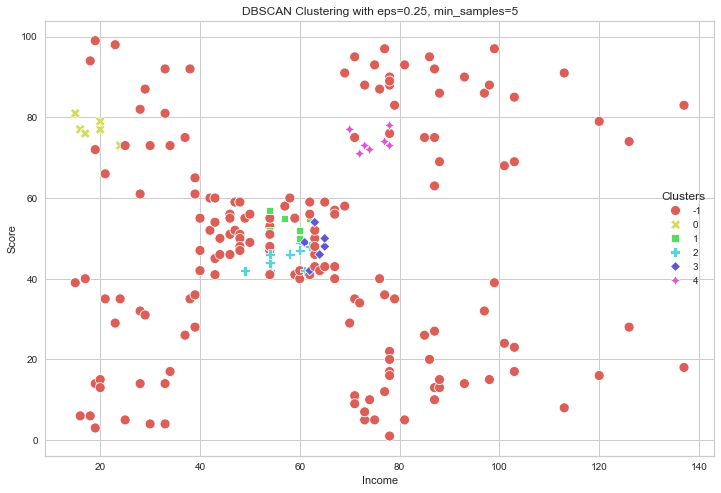

In [128]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Assume 'customer_df' is already defined with necessary columns
X = customer_df.iloc[:, 2:]  # Exclude 'CustomerID' and 'Gender'
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

def plotting_the_clusters(data, algorithm, args, kwds, verbose=True):
    start_time = time.time()
   
    # Fit the DBSCAN algorithm
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)

    end_time = time.time()
    
    # Calculate the silhouette score
    try:
        sc = metrics.silhouette_score(data, labels, metric='euclidean') if len(np.unique(labels)) > 1 else -1
    except:
        sc = -1
    
    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Silhouette Coefficient: {sc}")
    
    return sc, len(np.unique(labels))

# Set the DBSCAN parameters
eps = 0.25
min_samples = 5

# Perform clustering with DBSCAN using eps=0.25 and min_samples=5
print(f"\nDBSCAN Clustering with eps={eps}, min_samples={min_samples}")

silhouette_score, num_clusters_found = plotting_the_clusters(X_scaled, DBSCAN, (), {'eps': eps, 'min_samples': min_samples})

# Create the DBSCAN model with eps=0.25 and min_samples=5
dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)

# Assign labels to the original DataFrame
customer_df['DBSCAN_Labels'] = dbscan_model.labels_

# Visualize the clusters found by DBSCAN
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_df, x='Income', y='Score', hue='DBSCAN_Labels', 
                palette=sns.color_palette('hls', np.unique(dbscan_model.labels_).shape[0]), 
                style='DBSCAN_Labels', s=100)

plt.title(f'DBSCAN Clustering with eps={eps}, min_samples={min_samples}')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Clusters')
plt.show()


This negative silhouette score of -0.30748 suggests that DBSCAN clustering with eps=0.25 and min_samples=5, resulting in 6 clusters, has poorly defined cluster boundaries. Many points are either misclassified, poorly clustered, or assigned as noise. A negative silhouette score indicates that points are often closer to points in neighbouring clusters than to points within their own clusters, leading to weak cohesion and poor separation between clusters.


New best score: 0.4278476609498341 with eps=1, min_samples=1
New best score: 0.45478711456509 with eps=1, min_samples=2
New best score: 0.5179571560534026 with eps=1, min_samples=3
New best score: 0.5202401032073163 with eps=1, min_samples=5
New best score: 0.5428719285191996 with eps=1, min_samples=13
Best Silhouette Score: 0.5428719285191996 with eps=1, min_samples=13


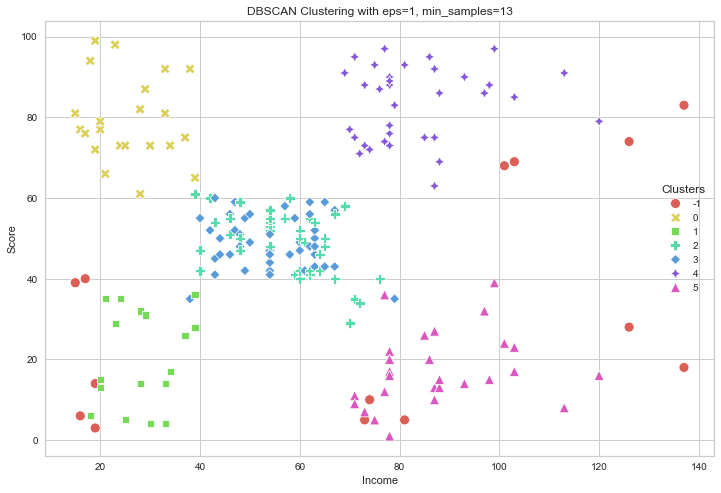

In [127]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = customer_df.iloc[:, 2:]  # Exclude 'CustomerID' and 'Gender'
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

def plotting_the_clusters(data, algorithm, args, kwds, verbose=True):
    start_time = time.time()
   
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)

    end_time = time.time()
    
    try:
        sc = metrics.silhouette_score(data, labels, metric='euclidean') if len(np.unique(labels)) > 1 else -1
    except:
        sc = -1
    
    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Silhouette Coefficient: {sc}")
    
    return sc, len(np.unique(labels))

# Initialize variables 
max_score = 0
best_eps = 0
best_min_samples = 0

# Iterate over a no of epsilon and min_samples values
for eps in range(1, 200):
    for min_samples in range(1, 30):
        score, num_clusters_found = plotting_the_clusters(X_scaled, DBSCAN, (), {'eps': eps, 'min_samples': min_samples}, verbose=False)
        if score > max_score:
            print(f"New best score: {score} with eps={eps}, min_samples={min_samples}")
            max_score = score
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Silhouette Score: {max_score} with eps={best_eps}, min_samples={best_min_samples}")

dbscan_model = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X_scaled)

customer_df['DBSCAN_Labels'] = dbscan_model.labels_

# Visualize the clusters found by DBSCAN
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_df, x='Income', y='Score', hue='DBSCAN_Labels', 
                palette=sns.color_palette('hls', np.unique(dbscan_model.labels_).shape[0]), 
                style='DBSCAN_Labels', s=100)

plt.title(f'DBSCAN Clustering with eps={best_eps}, min_samples={best_min_samples}')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Clusters')
plt.show()


The best silhouette score with best eps and best min samples iterating over a number of epsilon in range of (1,200) and min samples in range of (1,30).


### Varing Epsilon
The min_samples is set to 5 and epsilons eps= [0.1, 0.25, 0.5, 1, 1.5]



Testing DBSCAN with eps=0.1:
Number of clusters: 1
Clustering took 0.00 s
Silhouette Coefficient: -1


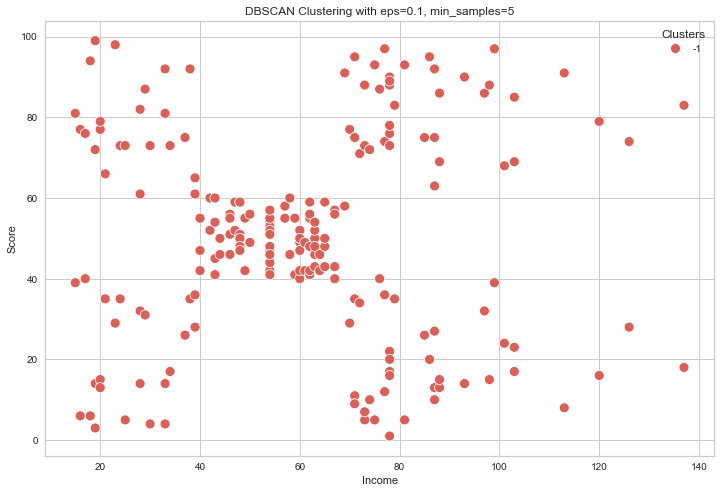


Testing DBSCAN with eps=0.25:
Number of clusters: 6
Clustering took 0.00 s
Silhouette Coefficient: 0.031755567100997764


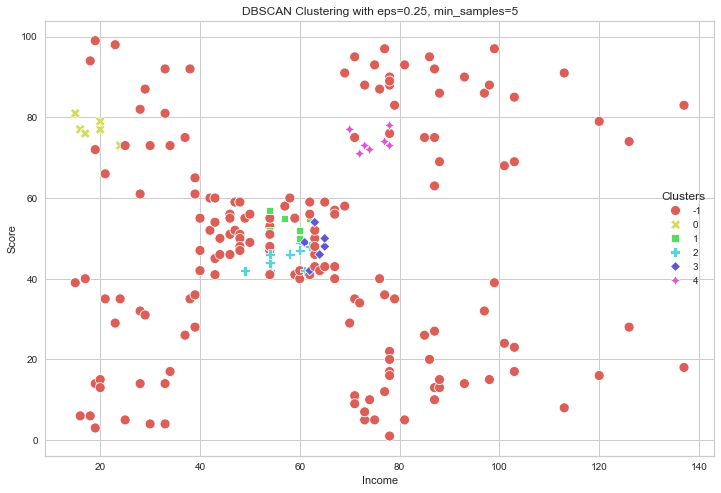


Testing DBSCAN with eps=0.5:
Number of clusters: 13
Clustering took 0.00 s
Silhouette Coefficient: 0.19628840518306162


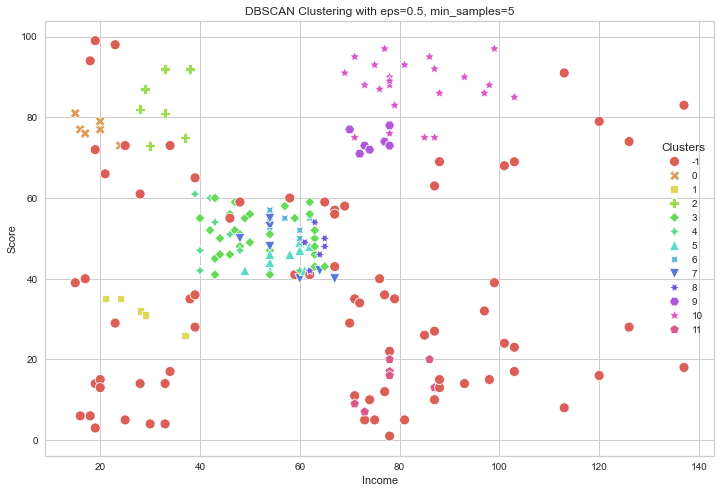


Testing DBSCAN with eps=1:
Number of clusters: 10
Clustering took 0.00 s
Silhouette Coefficient: 0.5161495561810098


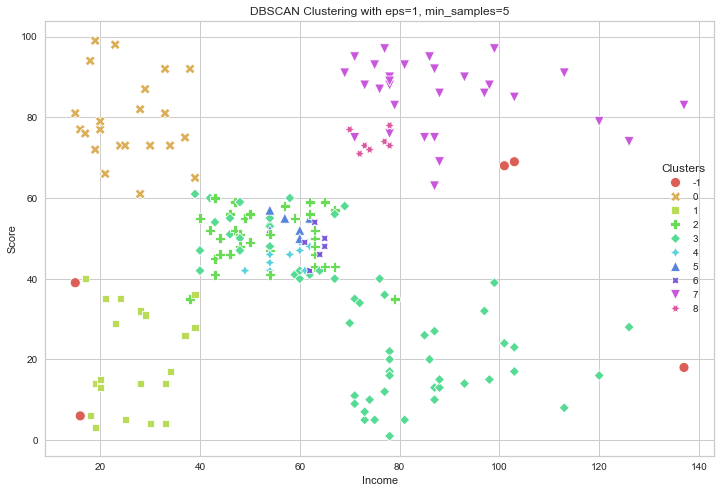


Testing DBSCAN with eps=1.5:
Number of clusters: 9
Clustering took 0.00 s
Silhouette Coefficient: 0.5235732570039091


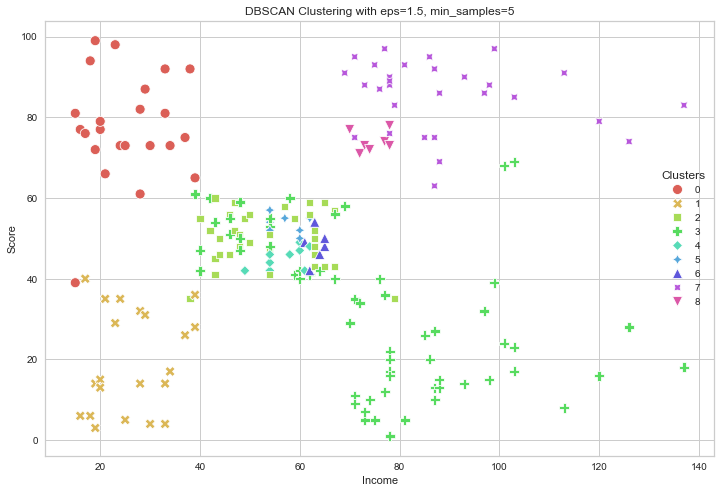


Best Silhouette Score: 0 with eps=0


In [129]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Prepare the data
X = customer_df.iloc[:, 2:]  # Exclude 'CustomerID' and 'Gender'
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Function to plot clusters and compute silhouette score
def plotting_the_clusters(data, algorithm, args, kwds, verbose=True):
    start_time = time.time()

    # Fit algorithm to data
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)

    end_time = time.time()

    # Calculate silhouette score only if more than 1 cluster
    try:
        sc = metrics.silhouette_score(data, labels, metric='euclidean') if len(np.unique(labels)) > 1 else -1
    except:
        sc = -1

    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Silhouette Coefficient: {sc}")
    
    return sc, len(np.unique(labels)), labels

# Define a list of epsilon values to test
epsilons = [0.1, 0.25, 0.5, 1, 1.5]

# Iterate over the different epsilon values and plot clusters
for eps in epsilons:
    print(f"\nTesting DBSCAN with eps={eps}:")
    
    score, num_clusters_found, labels = plotting_the_clusters(X_scaled, DBSCAN, (), {'eps': eps, 'min_samples': 5}, verbose=True)

    # Add the cluster labels to the DataFrame
    customer_df['DBSCAN_Labels'] = labels

    # Visualize the clusters
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=customer_df, x='Income', y='Score', hue='DBSCAN_Labels', 
                    palette=sns.color_palette('hls', np.unique(labels).shape[0]), style='DBSCAN_Labels', s=100)

    plt.title(f'DBSCAN Clustering with eps={eps}, min_samples=5')
    plt.xlabel('Income')
    plt.ylabel('Score')
    plt.legend(title='Clusters')
    plt.show()

# The best configuration is already handled above; however, 
# we can still record the best silhouette score, if desired.
max_score = 0
best_eps = 0

# Iterate over a finer range of epsilon values if needed
for eps in np.arange(0.005, 0.1, 0.005):
    score, num_clusters_found, labels = plotting_the_clusters(X_scaled, DBSCAN, (), {'eps': eps, 'min_samples': 5}, verbose=False)
    if score > max_score:
        max_score = score
        best_eps = eps
        print(f"New best score: {score} with eps={eps}")

print(f"\nBest Silhouette Score: {max_score} with eps={best_eps}")


### Varing min_samples
min_samples_values = [1, 5, 10, 15, 20] and Epsilon is set to eps=1.5


Testing DBSCAN with eps=1.5, min_samples=1:
Number of clusters: 5
Clustering took 0.00 s
Silhouette Coefficient: 0.5509718688998576


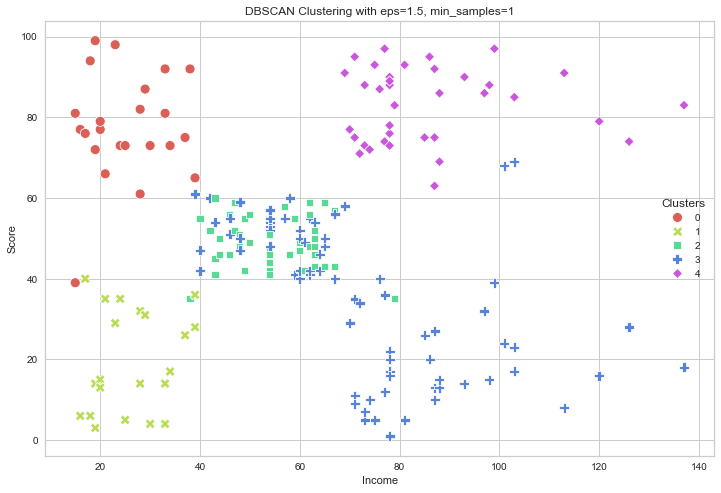


Testing DBSCAN with eps=1.5, min_samples=5:
Number of clusters: 5
Clustering took 0.00 s
Silhouette Coefficient: 0.5509718688998576


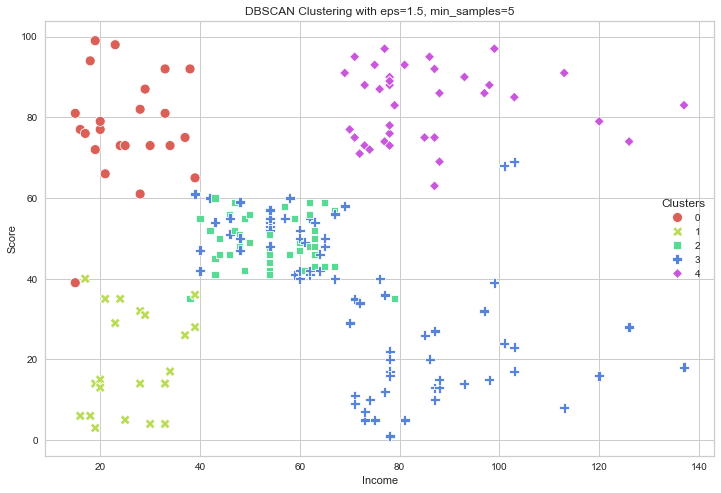


Testing DBSCAN with eps=1.5, min_samples=10:
Number of clusters: 5
Clustering took 0.00 s
Silhouette Coefficient: 0.5509718688998576


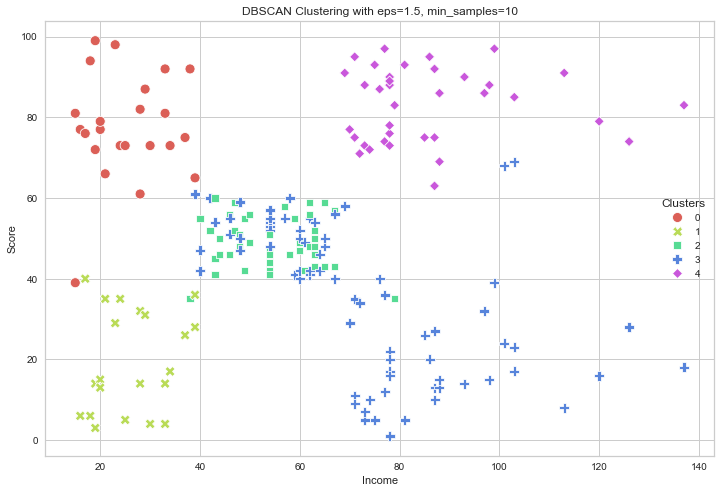


Testing DBSCAN with eps=1.5, min_samples=15:
Number of clusters: 5
Clustering took 0.00 s
Silhouette Coefficient: 0.5509718688998576


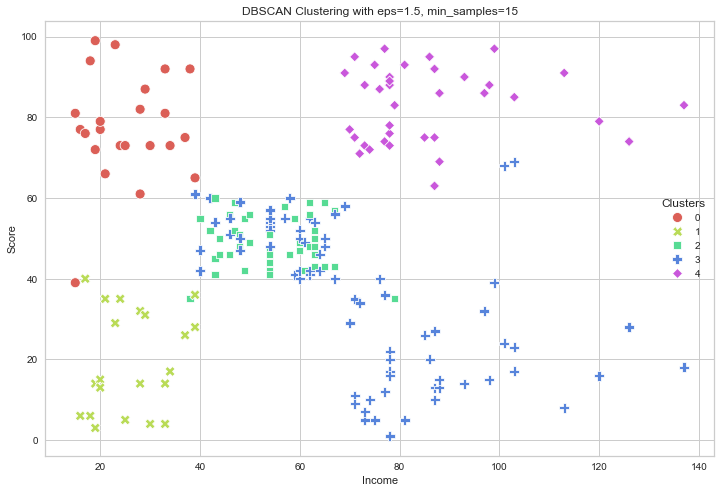


Testing DBSCAN with eps=1.5, min_samples=20:
Number of clusters: 5
Clustering took 0.00 s
Silhouette Coefficient: 0.5509718688998576


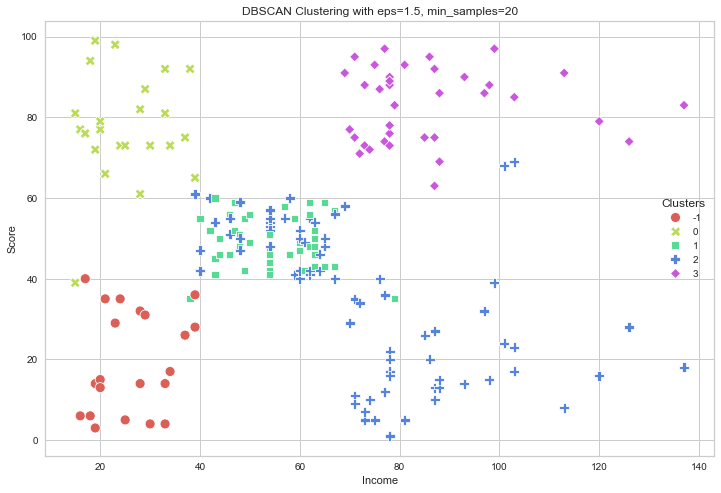

New best score: 0.5509718688998576 with eps=1.5, min_samples=1

Best Silhouette Score: 0.5509718688998576 with eps=1.5, min_samples=1


In [130]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Prepare the data
X = customer_df.iloc[:, 2:]  # Exclude 'CustomerID' and 'Gender'
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Function to plot clusters and compute silhouette score
def plotting_the_clusters(data, algorithm, args, kwds, verbose=True):
    start_time = time.time()

    # Fit algorithm to data
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)

    end_time = time.time()

    # Calculate silhouette score only if more than 1 cluster
    try:
        sc = metrics.silhouette_score(data, labels, metric='euclidean') if len(np.unique(labels)) > 1 else -1
    except:
        sc = -1

    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Silhouette Coefficient: {sc}")
    
    return sc, len(np.unique(labels)), labels

# Define the constant epsilon value
eps = 1.5

# Define a list of min_samples values to test
min_samples_values = [1, 5, 10, 15, 20]

# Iterate over the different min_samples values and plot clusters
for min_samples in min_samples_values:
    print(f"\nTesting DBSCAN with eps={eps}, min_samples={min_samples}:")
    
    score, num_clusters_found, labels = plotting_the_clusters(X_scaled, DBSCAN, (), {'eps': eps, 'min_samples': min_samples}, verbose=True)

    # Add the cluster labels to the DataFrame
    customer_df['DBSCAN_Labels'] = labels

    # Visualize the clusters
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=customer_df, x='Income', y='Score', hue='DBSCAN_Labels', 
                    palette=sns.color_palette('hls', np.unique(labels).shape[0]), style='DBSCAN_Labels', s=100)

    plt.title(f'DBSCAN Clustering with eps={eps}, min_samples={min_samples}')
    plt.xlabel('Income')
    plt.ylabel('Score')
    plt.legend(title='Clusters')
    plt.show()

# The best configuration is already handled above; however, 
# we can still record the best silhouette score, if desired.
max_score = 0
best_min_samples = 0

# Iterate over a finer range of min_samples values if needed
for min_samples in range(1, 30):
    score, num_clusters_found, labels = plotting_the_clusters(X_scaled, DBSCAN, (), {'eps': eps, 'min_samples': min_samples}, verbose=False)
    if score > max_score:
        max_score = score
        best_min_samples = min_samples
        print(f"New best score: {score} with eps={eps}, min_samples={min_samples}")

print(f"\nBest Silhouette Score: {max_score} with eps={eps}, min_samples={best_min_samples}")


### Evaluation of  DBSCAN Algorithm
- Performance: DBSCAN is very simple, powerful and fast algorithm.
- Parameter Tuning: epsilon and min_samples are crucial for the algorithms success, where epsilon is the maximum distance between two points where they are neighbours, we must estimate a good value for epsilon because if its set too high causes clusters to merge or when set too low it can fragment clusters but its non trivial task to find good epsilon value. Similarly, for min_samples its non trivial to find a good value.
- correctness: DBSCAN is capable of assigning correct cluster if clusters are similar densities as it is capable of detecting clusters in datasets with noise and if noise is ignored. It also depends on epsilon and min_samples where incorrect values gives incorrect merging of different clusters.
- Deterministic: DBSCAN produces same and consistent clustering results as long as the epsilon and min_samples values are not chaged.

## MeanShift

Mean shift clustering is centroid based clustering algorithm and it  starts by placing a circle centered on each instance then for each circle it computes the mean of all the instances located within it and it shifts the circle so that its centered on the mean. Then iterate mean shifting step untill each of them is centered on the mean of the instances it contains. Mean shift shifts circle in the direction of higher density until each of them has found a local density maximum. Then all the instances whose circles have settled close enough are assigned to the same cluster.

The advantages of Mean shift:
- Mean shift can find any number of clusters of any shape.
- It has only one hyperparameter called bandwidth and it relies on local density estimation.
- It determines number of clusters based on bandwidth which is set by us.
- Outliers don't cause any issues to the algorithm.


The drawbacks of Mean shift:
- Unlike DBSCAN mean shift tends to chop clusters into pieces when they have internal density variations.
- Its computational complexity is O(m^2n) so it is not suited for large datasets.
- Bandwidth value selection is a non trivial task and the result is dependent on bandwidth. Value of bandwidth can cause independent clusters being combined or data points being missed out.

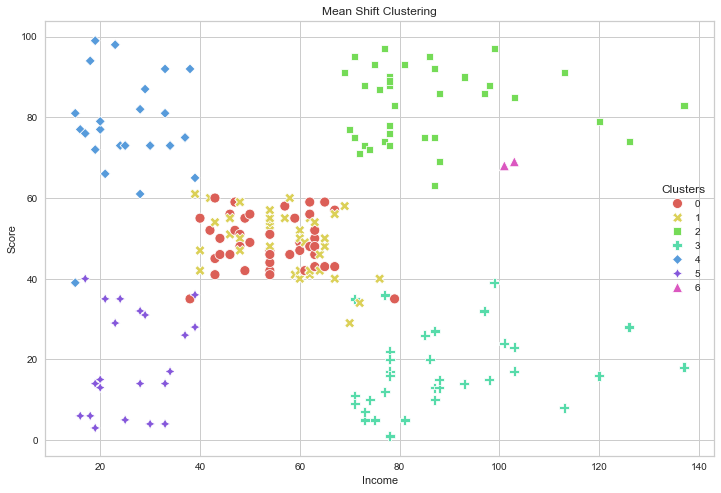

In [131]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Prepare the data
X = customer_df.iloc[:, 2:]  # Exclude 'CustomerID' and 'Gender'
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Estimate bandwidth
bandwidth = estimate_bandwidth(X_scaled, quantile=0.1)

# Fit Mean Shift with the estimated bandwidth
ms = MeanShift(bandwidth=bandwidth).fit(X_scaled)

# Add the cluster labels to the original data
customer_df['MeanShift_Labels'] = ms.labels_

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_df, x='Income', y='Score', hue='MeanShift_Labels', 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), style='MeanShift_Labels', s=100)

plt.title('Mean Shift Clustering')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Clusters')
plt.show()


New best score: 0.5987148193422501, Bandwidth: 1, Clusters: 9
Best Silhouette Score: 0.5987148193422501, Best Bandwidth: 1, Clusters Found: 9


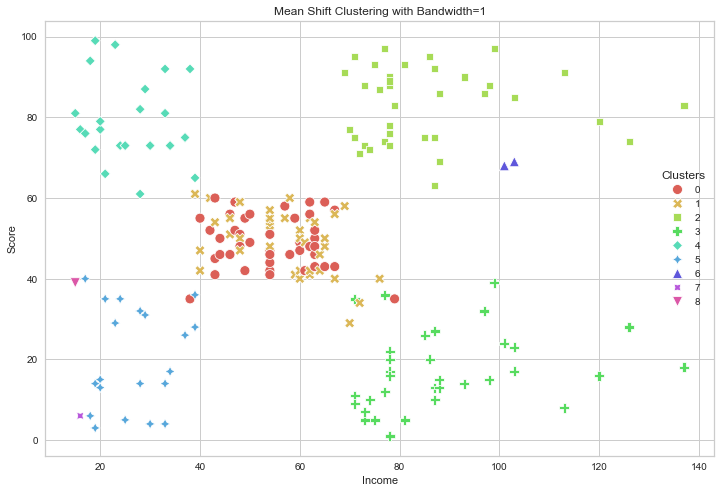

In [132]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = customer_df.iloc[:, 2:]  # Exclude 'CustomerID' and 'Gender'
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

def plotting_the_clusters(data, algorithm, args, kwds, verbose=True):
    start_time = time.time()

    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)

    end_time = time.time()
    
    try:
        sc = metrics.silhouette_score(data, labels, metric='euclidean') if len(np.unique(labels)) > 1 else -1
    except:
        sc = -1
    
    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Silhouette Coefficient: {sc}")
    
    return sc, len(np.unique(labels))

# Iterate over different bandwidth values
max_score = 0
best_bandwidth = 0
best_clusters = 0

for i in range(1, 100):
    bandwidth = i  
    score, num_clusters_found = plotting_the_clusters(X_scaled, MeanShift, (), {'bandwidth': bandwidth, 'cluster_all': True}, verbose=False)
    
    # best silhouette score and bandwidth
    if score > max_score:
        max_score = score
        best_bandwidth = bandwidth
        best_clusters = num_clusters_found
        print(f"New best score: {score}, Bandwidth: {bandwidth}, Clusters: {num_clusters_found}")

print(f"Best Silhouette Score: {max_score}, Best Bandwidth: {best_bandwidth}, Clusters Found: {best_clusters}")

ms = MeanShift(bandwidth=best_bandwidth).fit(X_scaled)

customer_df['MeanShift_Labels'] = ms.labels_

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_df, x='Income', y='Score', hue='MeanShift_Labels', 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), style='MeanShift_Labels', s=100)

plt.title(f'Mean Shift Clustering with Bandwidth={best_bandwidth}')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Clusters')
plt.show()


### Varing Bandwidth
We tested the effect on mean shift using differnt values of bandwidth. The chosen values are bandwidths = [0.075, 0.1, 0.150, 0.25, 0.3, 0.45]


Testing MeanShift with Bandwidth = 0.075:
Number of clusters: 198
Clustering took 0.22 s
Silhouette Coefficient: 0.013397210967370041

Testing MeanShift with Bandwidth = 0.1:
Number of clusters: 196
Clustering took 0.22 s
Silhouette Coefficient: 0.02202866932072337

Testing MeanShift with Bandwidth = 0.15:
Number of clusters: 183
Clustering took 0.22 s
Silhouette Coefficient: 0.07558584256995526

Testing MeanShift with Bandwidth = 0.25:
Number of clusters: 129
Clustering took 0.26 s
Silhouette Coefficient: 0.20134076026183514

Testing MeanShift with Bandwidth = 0.3:
Number of clusters: 111
Clustering took 0.27 s
Silhouette Coefficient: 0.23446920252497627

Testing MeanShift with Bandwidth = 0.45:
Number of clusters: 60
Clustering took 0.36 s
Silhouette Coefficient: 0.30209871887073825
New best score: 0.013397210967370041, Bandwidth: 0.075, Clusters: 198
New best score: 0.02202866932072337, Bandwidth: 0.1, Clusters: 196
New best score: 0.07558584256995526, Bandwidth: 0.15, Clusters: 18

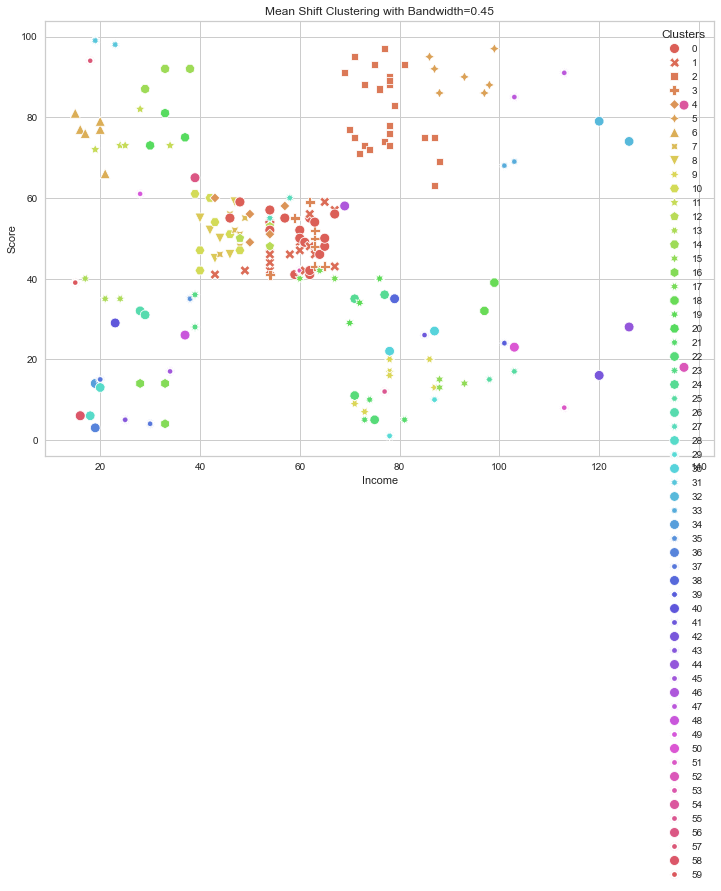

In [133]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = customer_df.iloc[:, 2:]  # Exclude 'CustomerID' and 'Gender'
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

def plotting_the_clusters(data, algorithm, args, kwds, verbose=True):
    start_time = time.time()

    # Fit algorithm to data
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)

    end_time = time.time()

    try:
        sc = metrics.silhouette_score(data, labels, metric='euclidean') if len(np.unique(labels)) > 1 else -1
    except:
        sc = -1
    
    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Silhouette Coefficient: {sc}")
    
    return sc, len(np.unique(labels))

# Bandwidth values to test
bandwidths = [0.075, 0.1, 0.150, 0.25, 0.3, 0.45]

# Iterate over the selected bandwidths
for bandwidth in bandwidths:
    print(f"\nTesting MeanShift with Bandwidth = {bandwidth}:")
    score, num_clusters_found = plotting_the_clusters(X_scaled, MeanShift, (), {'bandwidth': bandwidth, 'cluster_all': True}, verbose=True)

# Find the best bandwidth from the tested values
max_score = 0
best_bandwidth = 0
best_clusters = 0

for bandwidth in bandwidths:
    score, num_clusters_found = plotting_the_clusters(X_scaled, MeanShift, (), {'bandwidth': bandwidth, 'cluster_all': True}, verbose=False)
    
    if score > max_score:
        max_score = score
        best_bandwidth = bandwidth
        best_clusters = num_clusters_found
        print(f"New best score: {score}, Bandwidth: {bandwidth}, Clusters: {num_clusters_found}")

print(f"\nBest Silhouette Score: {max_score}, Best Bandwidth: {best_bandwidth}, Clusters Found: {best_clusters}")

ms = MeanShift(bandwidth=best_bandwidth).fit(X_scaled)

customer_df['MeanShift_Labels'] = ms.labels_

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_df, x='Income', y='Score', hue='MeanShift_Labels', 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), style='MeanShift_Labels', s=100)

plt.title(f'Mean Shift Clustering with Bandwidth={best_bandwidth}')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Clusters')
plt.show()


We found that as bandwidth increase the number of clusters decreases. As smaller bandwidth results in narrower search area so after points are shifted to local density maximum, still many points will be remained outside that neighbourhood then these points will be clustered into additional clusters, which results in the increase in the number of clusters.

The silhouette coefficient increase as bandwidth increases, mean shift assume globular clusters and the clusters in the dataset are globular.

### Evaluation of Mean shift
- Performance: Mean shift is slow and doesn't scale with large datasets.
- Parameter Tuning: Choice of bandwidth value is crucial, its trail and error to find optimal value.
- correctness: It doesn't cluster evry data point into the cluster but according to the algorithm it may struggle with irregular shaped clusters by merging them with nearby clusters. so, the performance can be suboptimal for data for irregular cluster shapes.
- Deterministic: The results may vary due to random initialization for same bandwidth across different runs.

## Discussion on the dataset

By analyzing the dataset, we found that density-based clustering algorithms such as DBSCAN yield inconclusive results in the visualizations. K-Means and Mean Shift gave better performance in terms of visualization and silhouette coefficient score. This difference in performance can be attributed to the feature space exhibiting relatively uniform density, with indistinct cluster boundaries.
DBSCAN link points from different clusters within the same neighbourhood region, accommodating non-spherical clusters. Mean Shift and K-Means assume spherical clusters, coinciding with the dataset's cluster structure, leading to their effective performance. 

